In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.tsa.stattools import acf

In [2]:
# Simulation parameters 
sigma = 1
rho = 0.5

# Tauchen chain
s = sigma / np.sqrt(1-rho**2)
S = [s, -s]
p = (1 + rho) / 2
P = [[p, 1-p], [1-p, p]]

# Simulate the AR(1) process and Tauchen chain
np.random.seed(42)
T = 100
y_path, s_path = [s], [s]
mu = norm.rvs(loc=0, scale=sigma, size=T)
for t in range(T):
    y_path.append(rho*y_path[t] + mu[t])
    
    tr_pr = (s_path[t] == s)*P[0] + (s_path[t] == -s)*P[1]
    
    # Inverse cdf method with corresponding sample
    cdf_val = 1 - norm.cdf(mu[t])
    s_path.append((cdf_val < tr_pr[0])*s + (cdf_val > tr_pr[0])*(-s))

# Acfs
tauchen_acf = acf(s_path, fft=False)
ar1_acf = acf(y_path, fft=False)

/Users/danielmpfeffer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


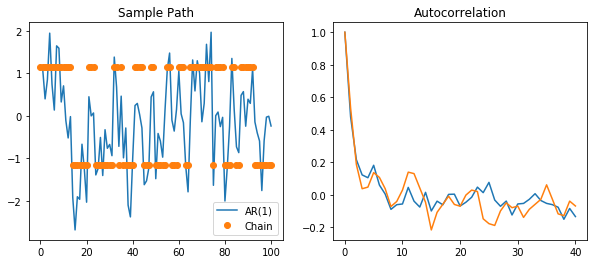

In [3]:
# Plot sample paths and acfs
plt.figure(figsize=(10,4))

ax1 = plt.subplot(121)
plt.plot(y_path, label='AR(1)')
plt.plot(s_path,'o', label='Chain')
plt.legend()
plt.title('Sample Path')

ax2 = plt.subplot(122)
plt.plot(ar1_acf)
plt.plot(tauchen_acf)
plt.title('Autocorrelation')

plt.savefig('q1-sim')